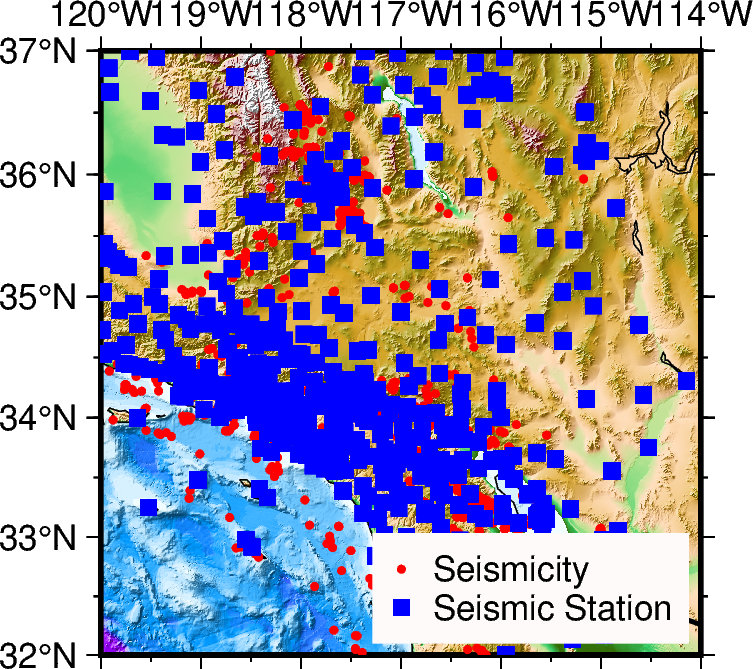

In [1]:
import pygmt
import pandas as pd
import numpy as np

datadir="./"

minlon, maxlon = -120, -114 #32, 37, -73.5, -35
minlat, maxlat = 32, 37 # -120, -114, -35, -30

#define etopo data file
topo_data = '@earth_relief_15s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")

#plot high res topography
fig.grdimage(grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    cmap="globe",projection='M2i',shading=True,frame=['xa1f0.5+l"longitude"', 'ya1f0.5+l"latitude"', 'WsNe'])

fig.coast(frame=False,shorelines=True,borders='1/1p,black')

#plot fault lines
#fig.plot(data = f"{datadir}/AMFault")

#plot events
df=pd.read_csv(f"{datadir}/events.csv", sep=',', usecols=[0,1,2,3,5])
df.columns=["time","lat","lon","dep","mag"]
fig.plot(x=df["lon"], y=df["lat"], color="red", style="c0.07c", label="Seismicity")
# plot stations
df=pd.read_csv(f"{datadir}/stations.txt", sep='|', usecols=[0,1,4,5])
df.columns=["net","station","lat","lon"]
fig.plot(x=df["lon"], y=df["lat"], color="blue", style="s0.2c", label='"Seismic Station"')

fig.legend(position="Jbr+jbr+o0.1c", box="+gsnow")
fig.show()